In [1]:
import numpy as np
import tensorflow as tf
from numpy.random import randn
from qibo import gates, hamiltonians, models, set_backend
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib import colors
from scipy.stats import entropy

[Qibo 0.1.6.dev2|INFO|2021-09-10 18:58:01]: Using qibojit backend on /GPU:0


# 1D gamma distribution

## Loss function

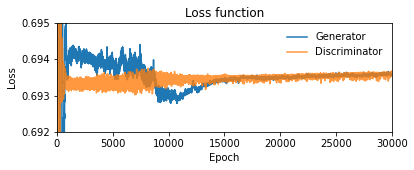

In [7]:
d_loss = np.loadtxt("dloss_1Dgamma_1_3_2_10000_128_0.5")
g_loss = np.loadtxt("gloss_1Dgamma_1_3_2_10000_128_0.5")
   
plt.figure(figsize=(6,2))
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(np.linspace(0, len(g_loss), len(g_loss)), g_loss, label='Generator')
plt.plot(np.linspace(0, len(d_loss), len(d_loss)), d_loss, label='Discriminator', alpha=0.8)
plt.legend(frameon=False)
plt.ylim(0.692,0.695)
plt.xlim([0,30000])
plt.savefig("1Dgamma_loss.pdf", bbox_inches='tight')


## 10k samples

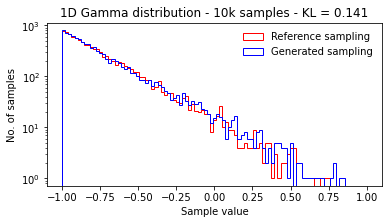

In [5]:
x_fake1 = np.loadtxt("fake_1dGAMMAdata_1_3_2_10000_10000_0.5")
x_real1 = np.loadtxt("real_1dGAMMAdata_1_3_2_10000_10000_0.5")
samples=10000
bins=100

plt.figure(figsize=(6,3))
plt.title('1D Gamma distribution - 10k samples - KL = 0.141')
plt.ylabel('No. of samples')
plt.xlabel('Sample value')
plt.hist(x_real1, np.linspace(-1.0, 1.0, bins), color='red', histtype='step', label='Reference sampling')
plt.hist(x_fake1, np.linspace(-1.0, 1.0, bins), color='blue', histtype='step', label='Generated sampling')
plt.legend(frameon=False)
plt.yscale('log')
plt.savefig("1Dgamma_distribution_10k.pdf", bbox_inches='tight')

## 100k samples

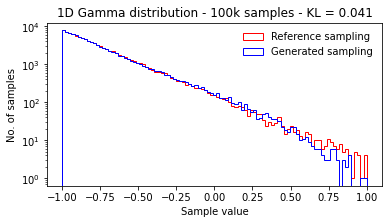

In [6]:
x_fake1 = np.loadtxt("fake_1dGAMMAdata_1_3_2_10000_100000_0.5")
x_real1 = np.loadtxt("real_1dGAMMAdata_1_3_2_10000_100000_0.5")
samples=100000
bins=100

plt.figure(figsize=(6,3))
plt.title('1D Gamma distribution - 100k samples - KL = 0.041')
plt.ylabel('No. of samples')
plt.xlabel('Sample value')
plt.hist(x_real1, np.linspace(-1.0, 1.0, bins), color='red', histtype='step', label='Reference sampling')
plt.hist(x_fake1, np.linspace(-1.0, 1.0, bins), color='blue', histtype='step', label='Generated sampling')
plt.legend(frameon=False)
plt.yscale('log')
plt.savefig("1Dgamma_distribution_100k.pdf", bbox_inches='tight')

# 3D correlated gaussian distribution

## 10k samples

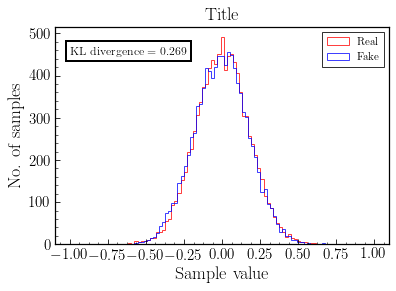

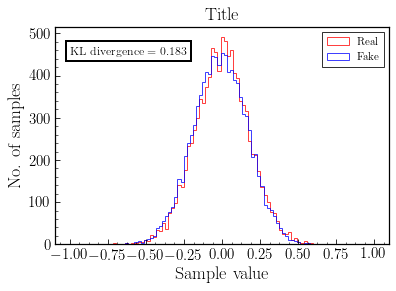

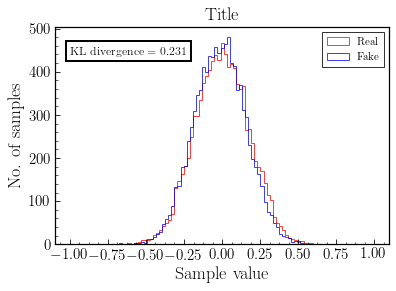

In [8]:
x_fake1 = np.loadtxt("fake1_3dGAUSSIANdata_3_5_2_10000_10000_0.5")
x_real1 = np.loadtxt("real1_3dGAUSSIANdata_3_5_2_10000_10000_0.5")
x_fake2 = np.loadtxt("fake2_3dGAUSSIANdata_3_5_2_10000_10000_0.5")
x_real2 = np.loadtxt("real2_3dGAUSSIANdata_3_5_2_10000_10000_0.5")
x_fake3 = np.loadtxt("fake3_3dGAUSSIANdata_3_5_2_10000_10000_0.5")
x_real3 = np.loadtxt("real3_3dGAUSSIANdata_3_5_2_10000_10000_0.5")
samples=10000
bins=100

fig = plt.figure()
plt.title('Title', fontsize=18)
plt.ylabel('No. of samples', fontsize=18)
plt.xlabel('Sample value', fontsize=18)
plt.hist(x_real1, np.linspace(-1.0, 1.0, bins), color='red', histtype='step', label='Real', alpha=0.75)
plt.hist(np.array(x_fake1), np.linspace(-1.0, 1.0, bins), color='blue', histtype='step', label='Fake', alpha=0.75)
plt.text(-1.0, 450, 'KL divergence = '+str(0.269), bbox=dict(fill=False, edgecolor='black', linewidth=2), fontsize=12)
plt.rcParams["axes.linewidth"]  = 1.25
plt.legend(fancybox=False, edgecolor='black', fontsize=11)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axes().xaxis.set_minor_locator(AutoMinorLocator())
plt.axes().yaxis.set_minor_locator(AutoMinorLocator())
plt.axes().tick_params(direction="in", which='major', length=5)
plt.axes().tick_params(direction="in", which='minor', length=2.5)
plt.show()
fig.savefig(f"1-distribution_3dgaussian_10k.pdf", bbox_inches='tight')

fig = plt.figure()
plt.title('Title', fontsize=18)
plt.ylabel('No. of samples', fontsize=18)
plt.xlabel('Sample value', fontsize=18)
plt.hist(x_real2, np.linspace(-1.0, 1.0, bins), color='red', histtype='step', label='Real', alpha=0.75)
plt.hist(np.array(x_fake2), np.linspace(-1.0, 1.0, bins), color='blue', histtype='step', label='Fake', alpha=0.75)
plt.text(-1.0, 450, 'KL divergence = '+str(0.183), bbox=dict(fill=False, edgecolor='black', linewidth=2), fontsize=12)
plt.rcParams["axes.linewidth"]  = 1.25
plt.legend(fancybox=False, edgecolor='black', fontsize=11)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axes().xaxis.set_minor_locator(AutoMinorLocator())
plt.axes().yaxis.set_minor_locator(AutoMinorLocator())
plt.axes().tick_params(direction="in", which='major', length=5)
plt.axes().tick_params(direction="in", which='minor', length=2.5)
plt.show()
fig.savefig(f"2-distribution_3dgaussian_10k.pdf", bbox_inches='tight')

fig = plt.figure()
plt.title('Title', fontsize=18)
plt.ylabel('No. of samples', fontsize=18)
plt.xlabel('Sample value', fontsize=18)
plt.hist(x_real3, np.linspace(-1.0, 1.0, bins), color='red', histtype='step', label='Real', alpha=0.75)
plt.hist(np.array(x_fake3), np.linspace(-1.0, 1.0, bins), color='blue', histtype='step', label='Fake', alpha=0.75)
plt.text(-1.0, 440, 'KL divergence = '+str(0.231), bbox=dict(fill=False, edgecolor='black', linewidth=2), fontsize=12)
plt.rcParams["axes.linewidth"]  = 1.25
plt.legend(fancybox=False, edgecolor='black', fontsize=11)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axes().xaxis.set_minor_locator(AutoMinorLocator())
plt.axes().yaxis.set_minor_locator(AutoMinorLocator())
plt.axes().tick_params(direction="in", which='major', length=5)
plt.axes().tick_params(direction="in", which='minor', length=2.5)
plt.show()
fig.savefig(f"3-distribution_3dgaussian_10k.pdf", bbox_inches='tight')

### Real 2d projections

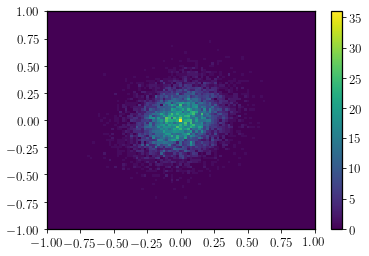

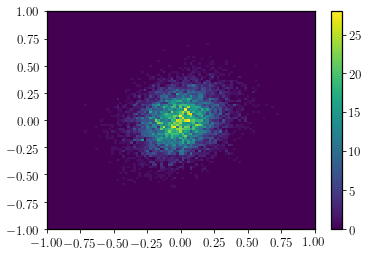

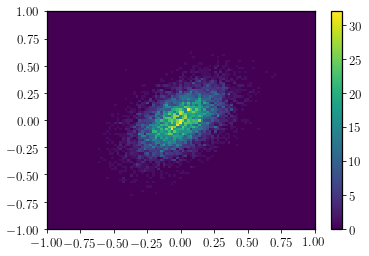

In [9]:
fig = plt.figure()
plt.ylabel('', fontsize=18)
plt.xlabel('', fontsize=18)
plt.hist2d(x_real1, x_real2, np.linspace(-1.0, 1.0, bins), color='red', label='real', alpha=1.0, linewidths=0)
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(13)
plt.rcParams["axes.linewidth"]  = 1.25
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()
fig.savefig(f"1-2_REAL_10k.png", bbox_inches='tight')

fig = plt.figure()
plt.ylabel('', fontsize=18)
plt.xlabel('', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.hist2d(x_real2, x_real3, np.linspace(-1.0, 1.0, bins), color='red', label='real', alpha=1.0, linewidths=0)
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(13)
plt.rcParams["axes.linewidth"]  = 1.25
plt.show()
fig.savefig(f"2-3_REAL_10k.png", bbox_inches='tight')

fig = plt.figure()
plt.ylabel('', fontsize=18)
plt.xlabel('', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.hist2d(x_real3, x_real1, np.linspace(-1.0, 1.0, bins), color='red', label='real', alpha=1.0, linewidths=0)
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(13)
plt.rcParams["axes.linewidth"]  = 1.25
plt.show()
fig.savefig(f"3-1_REAL_10k.png", bbox_inches='tight')

### Fake 2d projections 

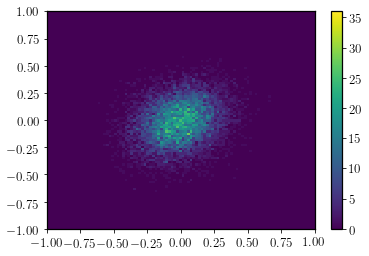

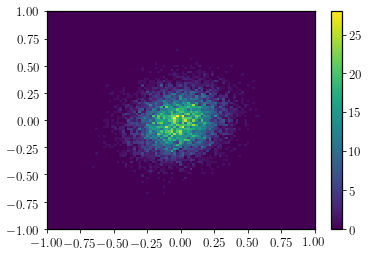

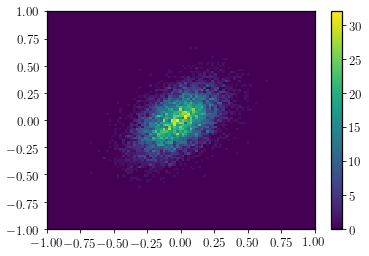

In [10]:
H, xedges, yedges = np.histogram2d(x_real1, x_real2, np.linspace(-1.0, 1.0, bins))
fig = plt.figure()
plt.ylabel('', fontsize=18)
plt.xlabel('', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.hist2d(x_fake1, x_fake2, np.linspace(-1.0, 1.0, bins), color='red', label='real', alpha=1.0, vmax=max(H.flatten()), linewidths=0)
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(13)
plt.rcParams["axes.linewidth"]  = 1.25
plt.show()
fig.savefig(f"1-2_FAKE_10k.png", bbox_inches='tight')

H, xedges, yedges = np.histogram2d(x_real2, x_real3, np.linspace(-1.0, 1.0, bins))
fig = plt.figure()
plt.ylabel('', fontsize=18)
plt.xlabel('', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.hist2d(x_fake2, x_fake3, np.linspace(-1.0, 1.0, bins), color='red', label='real', alpha=1.0, vmax=max(H.flatten()), linewidths=0)
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(13)
plt.rcParams["axes.linewidth"]  = 1.25
plt.show()
fig.savefig(f"2-3_FAKE_10k.png", bbox_inches='tight')

H, xedges, yedges = np.histogram2d(x_real3, x_real1, np.linspace(-1.0, 1.0, bins))
fig = plt.figure()
plt.ylabel('', fontsize=18)
plt.xlabel('', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.hist2d(x_fake3, x_fake1, np.linspace(-1.0, 1.0, bins), color='red', label='real', alpha=1.0, vmax=max(H.flatten()), linewidths=0)
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(13)
plt.rcParams["axes.linewidth"]  = 1.25
plt.show()
fig.savefig(f"3-1_FAKE_10k.png", bbox_inches='tight')

### Ratio Real/Fake

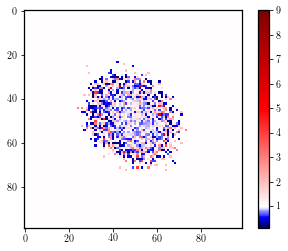

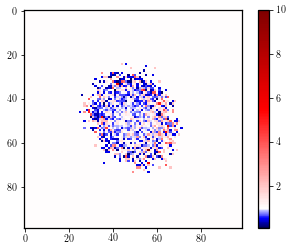

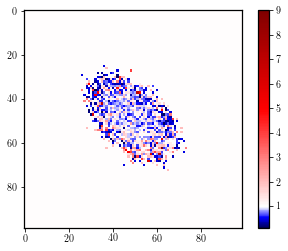

In [11]:
# set the colormap and centre the colorbar
class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

ratio = [0]*9801
H_real, xedges, yedges = np.histogram2d(x_real1, x_real2, np.linspace(-1.0, 1.0, bins))
H_fake, xedges, yedges = np.histogram2d(x_fake1, x_fake2, np.linspace(-1.0, 1.0, bins))
H_real = H_real.flatten()
H_fake = H_fake.flatten()
for i in range(len(ratio)):
    if H_fake[i] == 0:
        ratio[i] = 1
    elif H_real[i] == 0:
        ratio[i] = 1
    else:
        ratio[i] = H_real[i]/H_fake[i]

elev_min=float(max(ratio))
elev_max=float(min(ratio))
mid_val=1

plt.imshow(np.array(ratio).reshape(99,99), cmap='seismic', clim=(elev_min, elev_max), norm=MidpointNormalize(midpoint=mid_val,vmin=elev_min, vmax=elev_max))
plt.colorbar()
plt.show()

ratio = [0]*9801
H_real, xedges, yedges = np.histogram2d(x_real2, x_real3, np.linspace(-1.0, 1.0, bins))
H_fake, xedges, yedges = np.histogram2d(x_fake2, x_fake3, np.linspace(-1.0, 1.0, bins))
H_real = H_real.flatten()
H_fake = H_fake.flatten()
for i in range(len(ratio)):
    if H_fake[i] == 0:
        ratio[i] = 1
    elif H_real[i] == 0:
        ratio[i] = 1
    else:
        ratio[i] = H_real[i]/H_fake[i]

elev_min=float(max(ratio))
elev_max=float(min(ratio))
mid_val=1

plt.imshow(np.array(ratio).reshape(99,99), cmap='seismic', clim=(elev_min, elev_max), norm=MidpointNormalize(midpoint=mid_val,vmin=elev_min, vmax=elev_max))
plt.colorbar()
plt.show()

ratio = [0]*9801
H_real, xedges, yedges = np.histogram2d(x_real3, x_real1, np.linspace(-1.0, 1.0, bins))
H_fake, xedges, yedges = np.histogram2d(x_fake3, x_fake1, np.linspace(-1.0, 1.0, bins))
H_real = H_real.flatten()
H_fake = H_fake.flatten()
for i in range(len(ratio)):
    if H_fake[i] == 0:
        ratio[i] = 1
    elif H_real[i] == 0:
        ratio[i] = 1
    else:
        ratio[i] = H_real[i]/H_fake[i]

elev_min=float(max(ratio))
elev_max=float(min(ratio))
mid_val=1

plt.imshow(np.array(ratio).reshape(99,99), cmap='seismic', clim=(elev_min, elev_max), norm=MidpointNormalize(midpoint=mid_val,vmin=elev_min, vmax=elev_max))
plt.colorbar()
plt.show()

## 100k samples

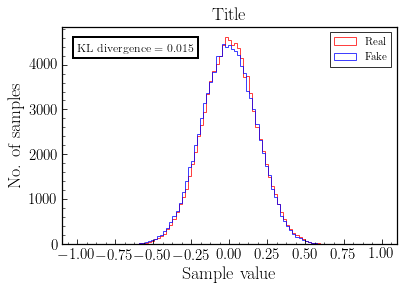

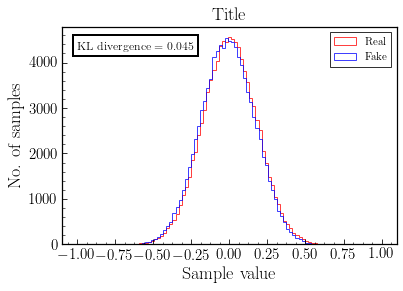

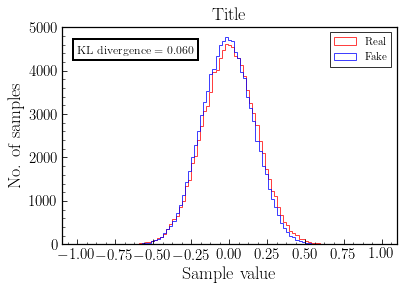

In [12]:
x_fake1 = np.loadtxt("fake1_3dGAUSSIANdata_3_5_2_10000_100000_0.5")
x_real1 = np.loadtxt("real1_3dGAUSSIANdata_3_5_2_10000_100000_0.5")
x_fake2 = np.loadtxt("fake2_3dGAUSSIANdata_3_5_2_10000_100000_0.5")
x_real2 = np.loadtxt("real2_3dGAUSSIANdata_3_5_2_10000_100000_0.5")
x_fake3 = np.loadtxt("fake3_3dGAUSSIANdata_3_5_2_10000_100000_0.5")
x_real3 = np.loadtxt("real3_3dGAUSSIANdata_3_5_2_10000_100000_0.5")
samples=100000
bins=100

fig = plt.figure()
plt.title('Title', fontsize=18)
plt.ylabel('No. of samples', fontsize=18)
plt.xlabel('Sample value', fontsize=18)
plt.hist(x_real1, np.linspace(-1.0, 1.0, bins), color='red', histtype='step', label='Real', alpha=0.75)
plt.hist(np.array(x_fake1), np.linspace(-1.0, 1.0, bins), color='blue', histtype='step', label='Fake', alpha=0.75)
plt.text(-1.0, 4300, 'KL divergence = '+str(0.015), bbox=dict(fill=False, edgecolor='black', linewidth=2), fontsize=12)
plt.rcParams["axes.linewidth"]  = 1.25
plt.legend(fancybox=False, edgecolor='black', fontsize=11)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axes().xaxis.set_minor_locator(AutoMinorLocator())
plt.axes().yaxis.set_minor_locator(AutoMinorLocator())
plt.axes().tick_params(direction="in", which='major', length=5)
plt.axes().tick_params(direction="in", which='minor', length=2.5)
plt.show()
fig.savefig(f"1-distribution_3dgaussian_100k.pdf", bbox_inches='tight')

fig = plt.figure()
plt.title('Title', fontsize=18)
plt.ylabel('No. of samples', fontsize=18)
plt.xlabel('Sample value', fontsize=18)
plt.hist(x_real2, np.linspace(-1.0, 1.0, bins), color='red', histtype='step', label='Real', alpha=0.75)
plt.hist(np.array(x_fake2), np.linspace(-1.0, 1.0, bins), color='blue', histtype='step', label='Fake', alpha=0.75)
plt.text(-1.0, 4300, 'KL divergence = '+str(0.045), bbox=dict(fill=False, edgecolor='black', linewidth=2), fontsize=12)
plt.rcParams["axes.linewidth"]  = 1.25
plt.legend(fancybox=False, edgecolor='black', fontsize=11)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axes().xaxis.set_minor_locator(AutoMinorLocator())
plt.axes().yaxis.set_minor_locator(AutoMinorLocator())
plt.axes().tick_params(direction="in", which='major', length=5)
plt.axes().tick_params(direction="in", which='minor', length=2.5)
plt.show()
fig.savefig(f"2-distribution_3dgaussian_100k.pdf", bbox_inches='tight')

fig = plt.figure()
plt.title('Title', fontsize=18)
plt.ylabel('No. of samples', fontsize=18)
plt.xlabel('Sample value', fontsize=18)
plt.hist(x_real3, np.linspace(-1.0, 1.0, bins), color='red', histtype='step', label='Real', alpha=0.75)
plt.hist(np.array(x_fake3), np.linspace(-1.0, 1.0, bins), color='blue', histtype='step', label='Fake', alpha=0.75)
plt.text(-1.0, 4400, 'KL divergence = '+str(f'0.060'), bbox=dict(fill=False, edgecolor='black', linewidth=2), fontsize=12)
plt.rcParams["axes.linewidth"]  = 1.25
plt.legend(fancybox=False, edgecolor='black', fontsize=11)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.axes().xaxis.set_minor_locator(AutoMinorLocator())
plt.axes().yaxis.set_minor_locator(AutoMinorLocator())
plt.axes().tick_params(direction="in", which='major', length=5)
plt.axes().tick_params(direction="in", which='minor', length=2.5)
plt.show()
fig.savefig(f"3-distribution_3dgaussian_100k.pdf", bbox_inches='tight')

### Real 2d projections

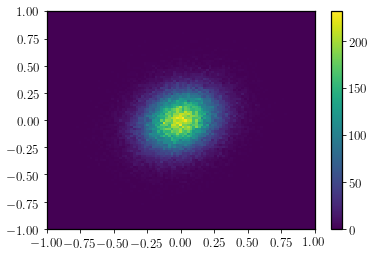

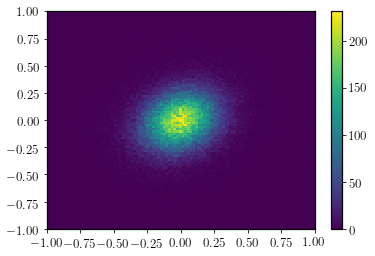

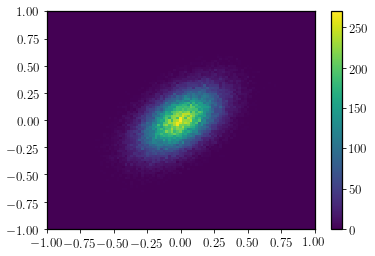

In [13]:
fig = plt.figure()
plt.ylabel('', fontsize=18)
plt.xlabel('', fontsize=18)
plt.hist2d(x_real1, x_real2, np.linspace(-1.0, 1.0, bins), color='red', label='real', alpha=1.0, linewidths=0)
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(13)
plt.rcParams["axes.linewidth"]  = 1.25
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()
fig.savefig(f"1-2_REAL_100k.png", bbox_inches='tight')

fig = plt.figure()
plt.ylabel('', fontsize=18)
plt.xlabel('', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.hist2d(x_real2, x_real3, np.linspace(-1.0, 1.0, bins), color='red', label='real', alpha=1.0, linewidths=0)
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(13)
plt.rcParams["axes.linewidth"]  = 1.25
plt.show()
fig.savefig(f"2-3_REAL_100k.png", bbox_inches='tight')

fig = plt.figure()
plt.ylabel('', fontsize=18)
plt.xlabel('', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.hist2d(x_real3, x_real1, np.linspace(-1.0, 1.0, bins), color='red', label='real', alpha=1.0, linewidths=0)
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(13)
plt.rcParams["axes.linewidth"]  = 1.25
plt.show()
fig.savefig(f"3-1_REAL_100k.png", bbox_inches='tight')

### Fake 2d projections

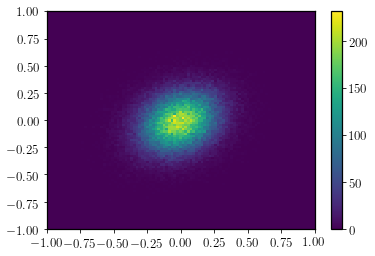

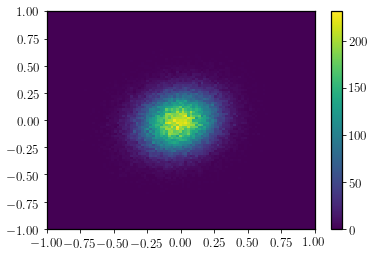

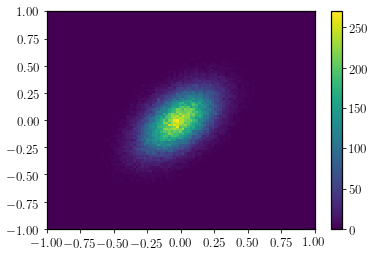

In [14]:
H, xedges, yedges = np.histogram2d(x_real1, x_real2, np.linspace(-1.0, 1.0, bins))
fig = plt.figure()
plt.ylabel('', fontsize=18)
plt.xlabel('', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.hist2d(x_fake1, x_fake2, np.linspace(-1.0, 1.0, bins), color='red', label='real', alpha=1.0, vmax=max(H.flatten()), linewidths=0)
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(13)
plt.rcParams["axes.linewidth"]  = 1.25
plt.show()
fig.savefig(f"1-2_FAKE_100k.png", bbox_inches='tight')

H, xedges, yedges = np.histogram2d(x_real2, x_real3, np.linspace(-1.0, 1.0, bins))
fig = plt.figure()
plt.ylabel('', fontsize=18)
plt.xlabel('', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.hist2d(x_fake2, x_fake3, np.linspace(-1.0, 1.0, bins), color='red', label='real', alpha=1.0, vmax=max(H.flatten()), linewidths=0)
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(13)
plt.rcParams["axes.linewidth"]  = 1.25
plt.show()
fig.savefig(f"2-3_FAKE_100k.png", bbox_inches='tight')

H, xedges, yedges = np.histogram2d(x_real3, x_real1, np.linspace(-1.0, 1.0, bins))
fig = plt.figure()
plt.ylabel('', fontsize=18)
plt.xlabel('', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.hist2d(x_fake3, x_fake1, np.linspace(-1.0, 1.0, bins), color='red', label='real', alpha=1.0, vmax=max(H.flatten()), linewidths=0)
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(13)
plt.rcParams["axes.linewidth"]  = 1.25
plt.show()
fig.savefig(f"3-1_FAKE_100k.png", bbox_inches='tight')

### Ratio Real/Fake

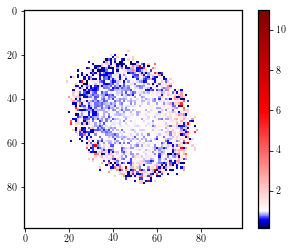

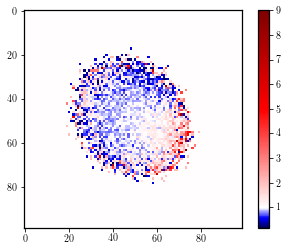

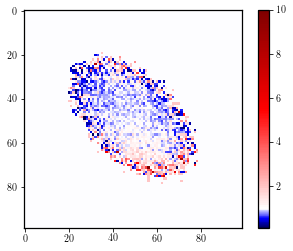

In [15]:
# set the colormap and centre the colorbar
class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

ratio = [0]*9801
H_real, xedges, yedges = np.histogram2d(x_real1, x_real2, np.linspace(-1.0, 1.0, bins))
H_fake, xedges, yedges = np.histogram2d(x_fake1, x_fake2, np.linspace(-1.0, 1.0, bins))
H_real = H_real.flatten()
H_fake = H_fake.flatten()
for i in range(len(ratio)):
    if H_fake[i] == 0:
        ratio[i] = 1
    elif H_real[i] == 0:
        ratio[i] = 1
    else:
        ratio[i] = H_real[i]/H_fake[i]

elev_min=float(max(ratio))
elev_max=float(min(ratio))
mid_val=1

plt.imshow(np.array(ratio).reshape(99,99), cmap='seismic', clim=(elev_min, elev_max), norm=MidpointNormalize(midpoint=mid_val,vmin=elev_min, vmax=elev_max))
plt.colorbar()
plt.show()

ratio = [0]*9801
H_real, xedges, yedges = np.histogram2d(x_real2, x_real3, np.linspace(-1.0, 1.0, bins))
H_fake, xedges, yedges = np.histogram2d(x_fake2, x_fake3, np.linspace(-1.0, 1.0, bins))
H_real = H_real.flatten()
H_fake = H_fake.flatten()
for i in range(len(ratio)):
    if H_fake[i] == 0:
        ratio[i] = 1
    elif H_real[i] == 0:
        ratio[i] = 1
    else:
        ratio[i] = H_real[i]/H_fake[i]

elev_min=float(max(ratio))
elev_max=float(min(ratio))
mid_val=1

plt.imshow(np.array(ratio).reshape(99,99), cmap='seismic', clim=(elev_min, elev_max), norm=MidpointNormalize(midpoint=mid_val,vmin=elev_min, vmax=elev_max))
plt.colorbar()
plt.show()

ratio = [0]*9801
H_real, xedges, yedges = np.histogram2d(x_real3, x_real1, np.linspace(-1.0, 1.0, bins))
H_fake, xedges, yedges = np.histogram2d(x_fake3, x_fake1, np.linspace(-1.0, 1.0, bins))
H_real = H_real.flatten()
H_fake = H_fake.flatten()
for i in range(len(ratio)):
    if H_fake[i] == 0:
        ratio[i] = 1
    elif H_real[i] == 0:
        ratio[i] = 1
    else:
        ratio[i] = H_real[i]/H_fake[i]

elev_min=float(max(ratio))
elev_max=float(min(ratio))
mid_val=1

plt.imshow(np.array(ratio).reshape(99,99), cmap='seismic', clim=(elev_min, elev_max), norm=MidpointNormalize(midpoint=mid_val,vmin=elev_min, vmax=elev_max))
plt.colorbar()
plt.show()